## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





Github link

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path = "/Users/debbie8265/Desktop/Computing for data analytics/train.csv"
train=pd.read_csv(path)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Rows and Columns

In [78]:
train.shape

(1460, 81)

## Check for duplications

In [290]:
train.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

## Column Names

In [279]:
list3=list(train.columns)
list3

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

## Null values

In [280]:
for i in range(0,81):
    if train[list3[i]].isnull().sum()>0:
        print((list3[i],train[list3[i]].isnull().sum()))
        
#'LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature' have too many missing values, so they don't have good predictive power

('LotFrontage', 259)
('Alley', 1369)
('MasVnrType', 8)
('MasVnrArea', 8)
('BsmtQual', 37)
('BsmtCond', 37)
('BsmtExposure', 38)
('BsmtFinType1', 37)
('BsmtFinType2', 38)
('Electrical', 1)
('FireplaceQu', 690)
('GarageType', 81)
('GarageYrBlt', 81)
('GarageFinish', 81)
('GarageQual', 81)
('GarageCond', 81)
('PoolQC', 1453)
('Fence', 1179)
('MiscFeature', 1406)


## Data Type

In [79]:
train['Id'] = train['Id'].astype('object')
train['MSSubClass'] = train['MSSubClass'].astype('object')

In [83]:
train.columns.to_series().groupby(train.dtypes).groups

{int64: ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

## Numerical Variables

#### 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'

In [91]:
train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Sale Price Distribution

Data is skewed towards the right and have outliers

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

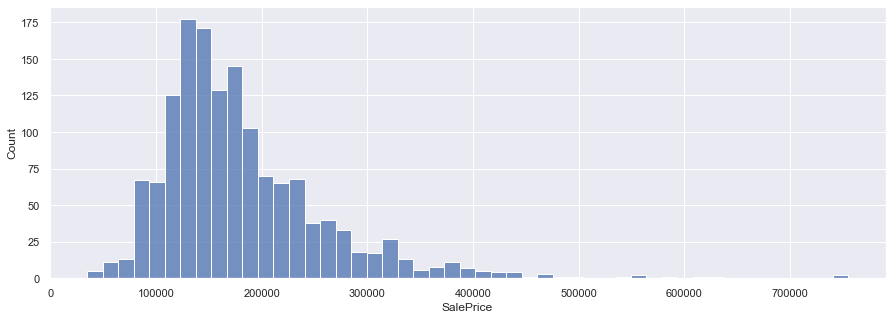

In [123]:
sns.histplot(train['SalePrice'])

/Users/debbie8265/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

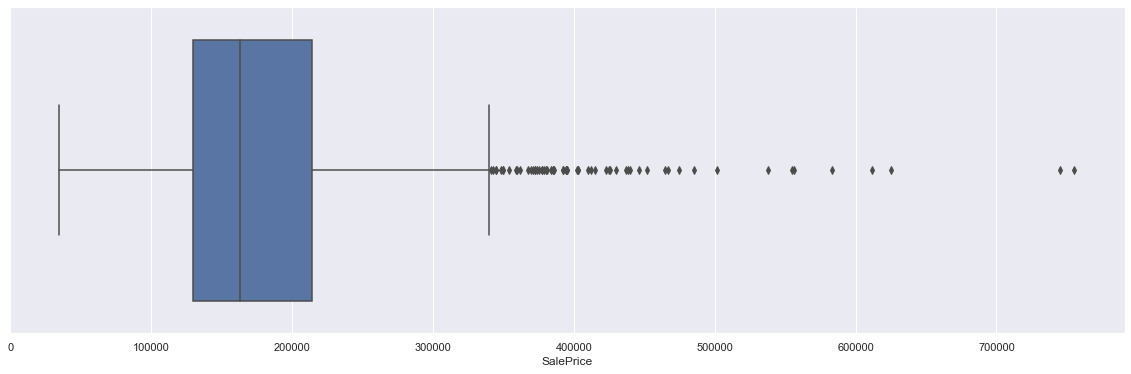

In [296]:
sns.boxplot(train['SalePrice'])

### Correlation

In [300]:
num_var=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

for i in num_var:
    print(train[[i, 'SalePrice']].corr())

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000
             OverallQual  SalePrice
OverallQual     1.000000   0.790982
SalePrice       0.790982   1.000000
             OverallCond  SalePrice
OverallCond     1.000000  -0.077856
SalePrice      -0.077856   1.000000
           YearBuilt  SalePrice
YearBuilt   1.000000   0.522897
SalePrice   0.522897   1.000000
              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.507101
SalePrice         0.507101   1.000000
            BsmtFinSF1  SalePrice
BsmtFinSF1     1.00000    0.38642
SalePrice      0.38642    1.00000
            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.011378
SalePrice    -0.011378   1.000000
           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.214479
SalePrice   0.214479   1.000000
             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.613581
SalePrice       0.613581   1.000000
           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.605852
SalePrice  

### Strong positive correlation relationships

- GrLivArea and SalePrice have strong positive correlation (Corr coef = 0.70) with p-value < 0.05
- OverallQual and SalePrice have strong positive correlation (Corr coef = 0.79) with p-value < 0.05

### 1. GrLivArea and SalePrice

In [98]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(train['GrLivArea'], train['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7086244776126521  with a P-value of P = 4.518033646779945e-223


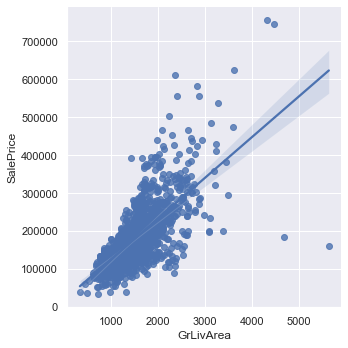

In [303]:
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = train)

### 2. OverallQual and SalePrice

In [99]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(train['OverallQual'], train['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7909816005838048  with a P-value of P = 2.185675268e-313


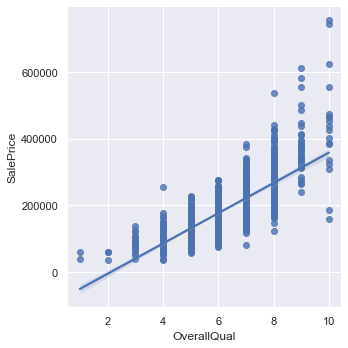

In [310]:
sns.lmplot(x = 'OverallQual', y = 'SalePrice', data = train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

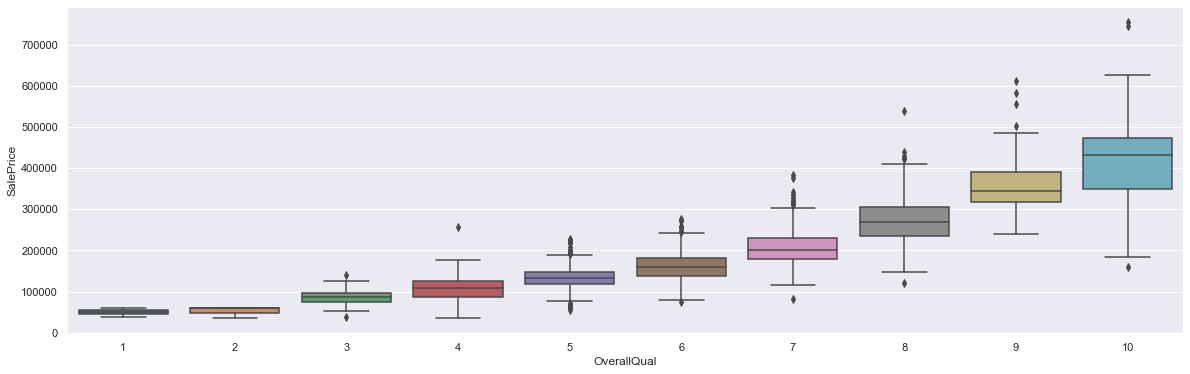

In [304]:
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

### Weak correlation relationships

- YrSold and SalePrice have weak correlation (Corr coef = -0.028923)
- MoSold and SalePrice have weak correlation (Corr coef = 0.046432)
- MiscVal and SalePrice have weak correlation (Corr coef = -0.02119)
- PoolArea and SalePrice have weak correlation (Corr coef = 0.092404)
- ScreenPorch and SalePrice have weak correlation (Corr coef = 0.111447)
- 3SsnPorch and SalePrice have weak correlation (Corr coef = 0.044584)
- EnclosedPorch and SalePrice have weak correlation (Corr coef = -0.128578)
- KitchenAbvGr and SalePrice have weak correlation (Corr coef = -0.135907)
- BedroomAbvGr and SalePrice have weak correlation (Corr coef = 0.168213)
- BsmtHalfBath and SalePrice have weak correlation (Corr coef = -0.016844)
- LowQualFinSF and SalePrice have weak correlation (Corr coef = -0.025606)
- BsmtFinSF2 and SalePrice have weak correlation (Corr coef = -0.011378)
- OverallCond and SalePrice have weak correlation (Corr coef = -0.077856)

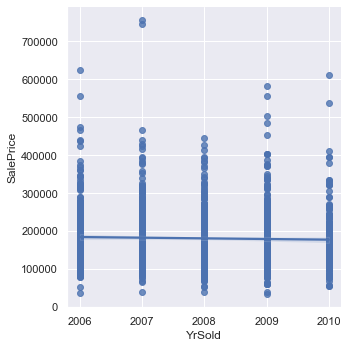

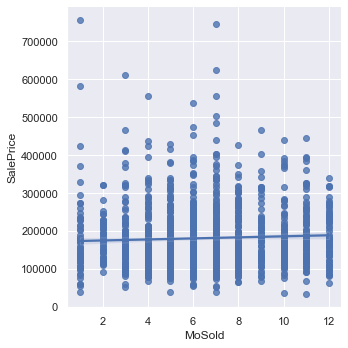

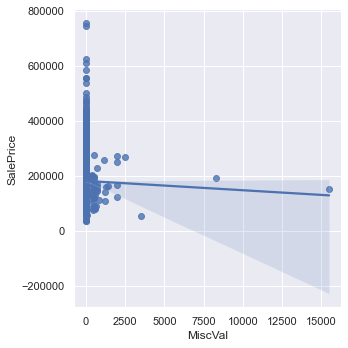

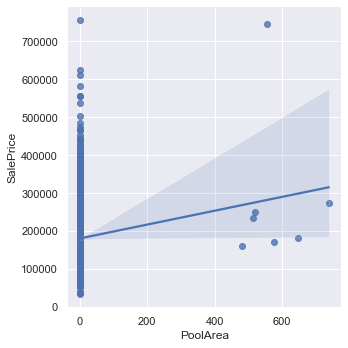

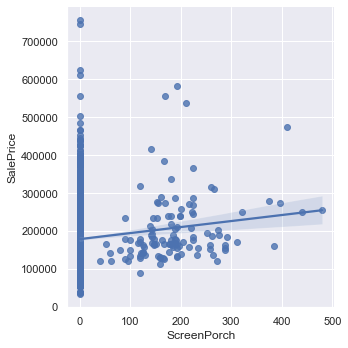

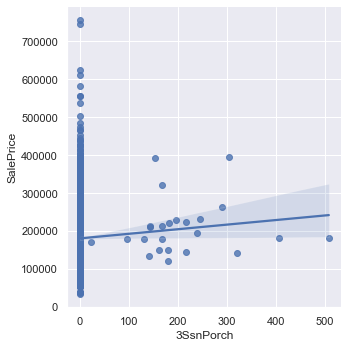

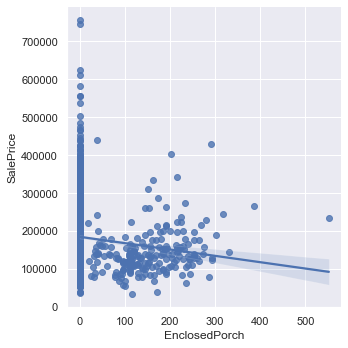

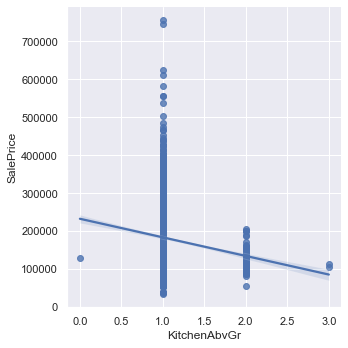

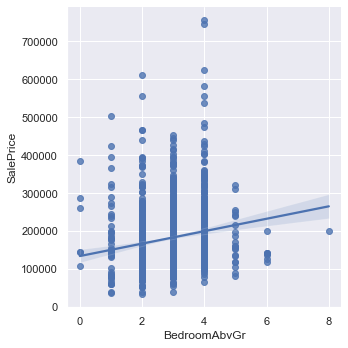

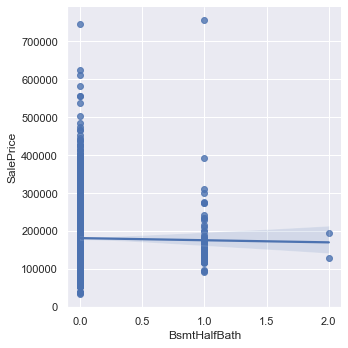

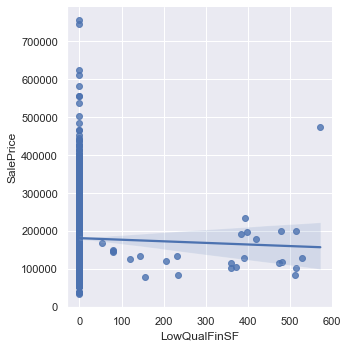

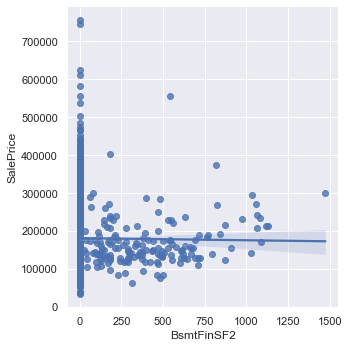

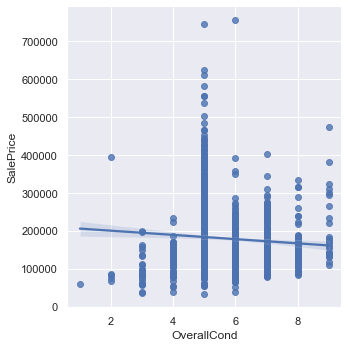

In [308]:
#Weak predictors
sns.lmplot(x = 'YrSold', y = 'SalePrice', data = train) # the regression line is close to horizontal
sns.lmplot(x = 'MoSold', y = 'SalePrice', data = train) # the regression line is close to horizontal
sns.lmplot(x = 'MiscVal', y = 'SalePrice', data = train) # the regression line is close to horizontal
sns.lmplot(x = 'PoolArea', y = 'SalePrice', data = train) # data is very scattered and far from the line(high variability)
sns.lmplot(x = 'ScreenPorch', y = 'SalePrice', data = train) # the regression line is close to horizontal, data is very scattered (high variability)
sns.lmplot(x = '3SsnPorch', y = 'SalePrice', data = train) # the regression line is close to horizontal, data is very scattered (high variability)
sns.lmplot(x = 'EnclosedPorch', y = 'SalePrice', data = train) # data is very scattered and far from the line (high variability)
sns.lmplot(x = 'KitchenAbvGr', y = 'SalePrice', data = train) # bad fit
sns.lmplot(x = 'BedroomAbvGr', y = 'SalePrice', data = train) # data is very far from the line
sns.lmplot(x = 'BsmtHalfBath', y = 'SalePrice', data = train) # the regression line is close to horizontal
sns.lmplot(x = 'LowQualFinSF', y = 'SalePrice', data = train) # most of the data points are far from the fitted line
sns.lmplot(x = 'BsmtFinSF2', y = 'SalePrice', data = train) # the regression line is close to horizontal
sns.lmplot(x = 'OverallCond', y = 'SalePrice', data = train) # the regression line is close to horizontal

### The rest of the numerical variables

/Users/debbie8265/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/debbie8265/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/debbie8265/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

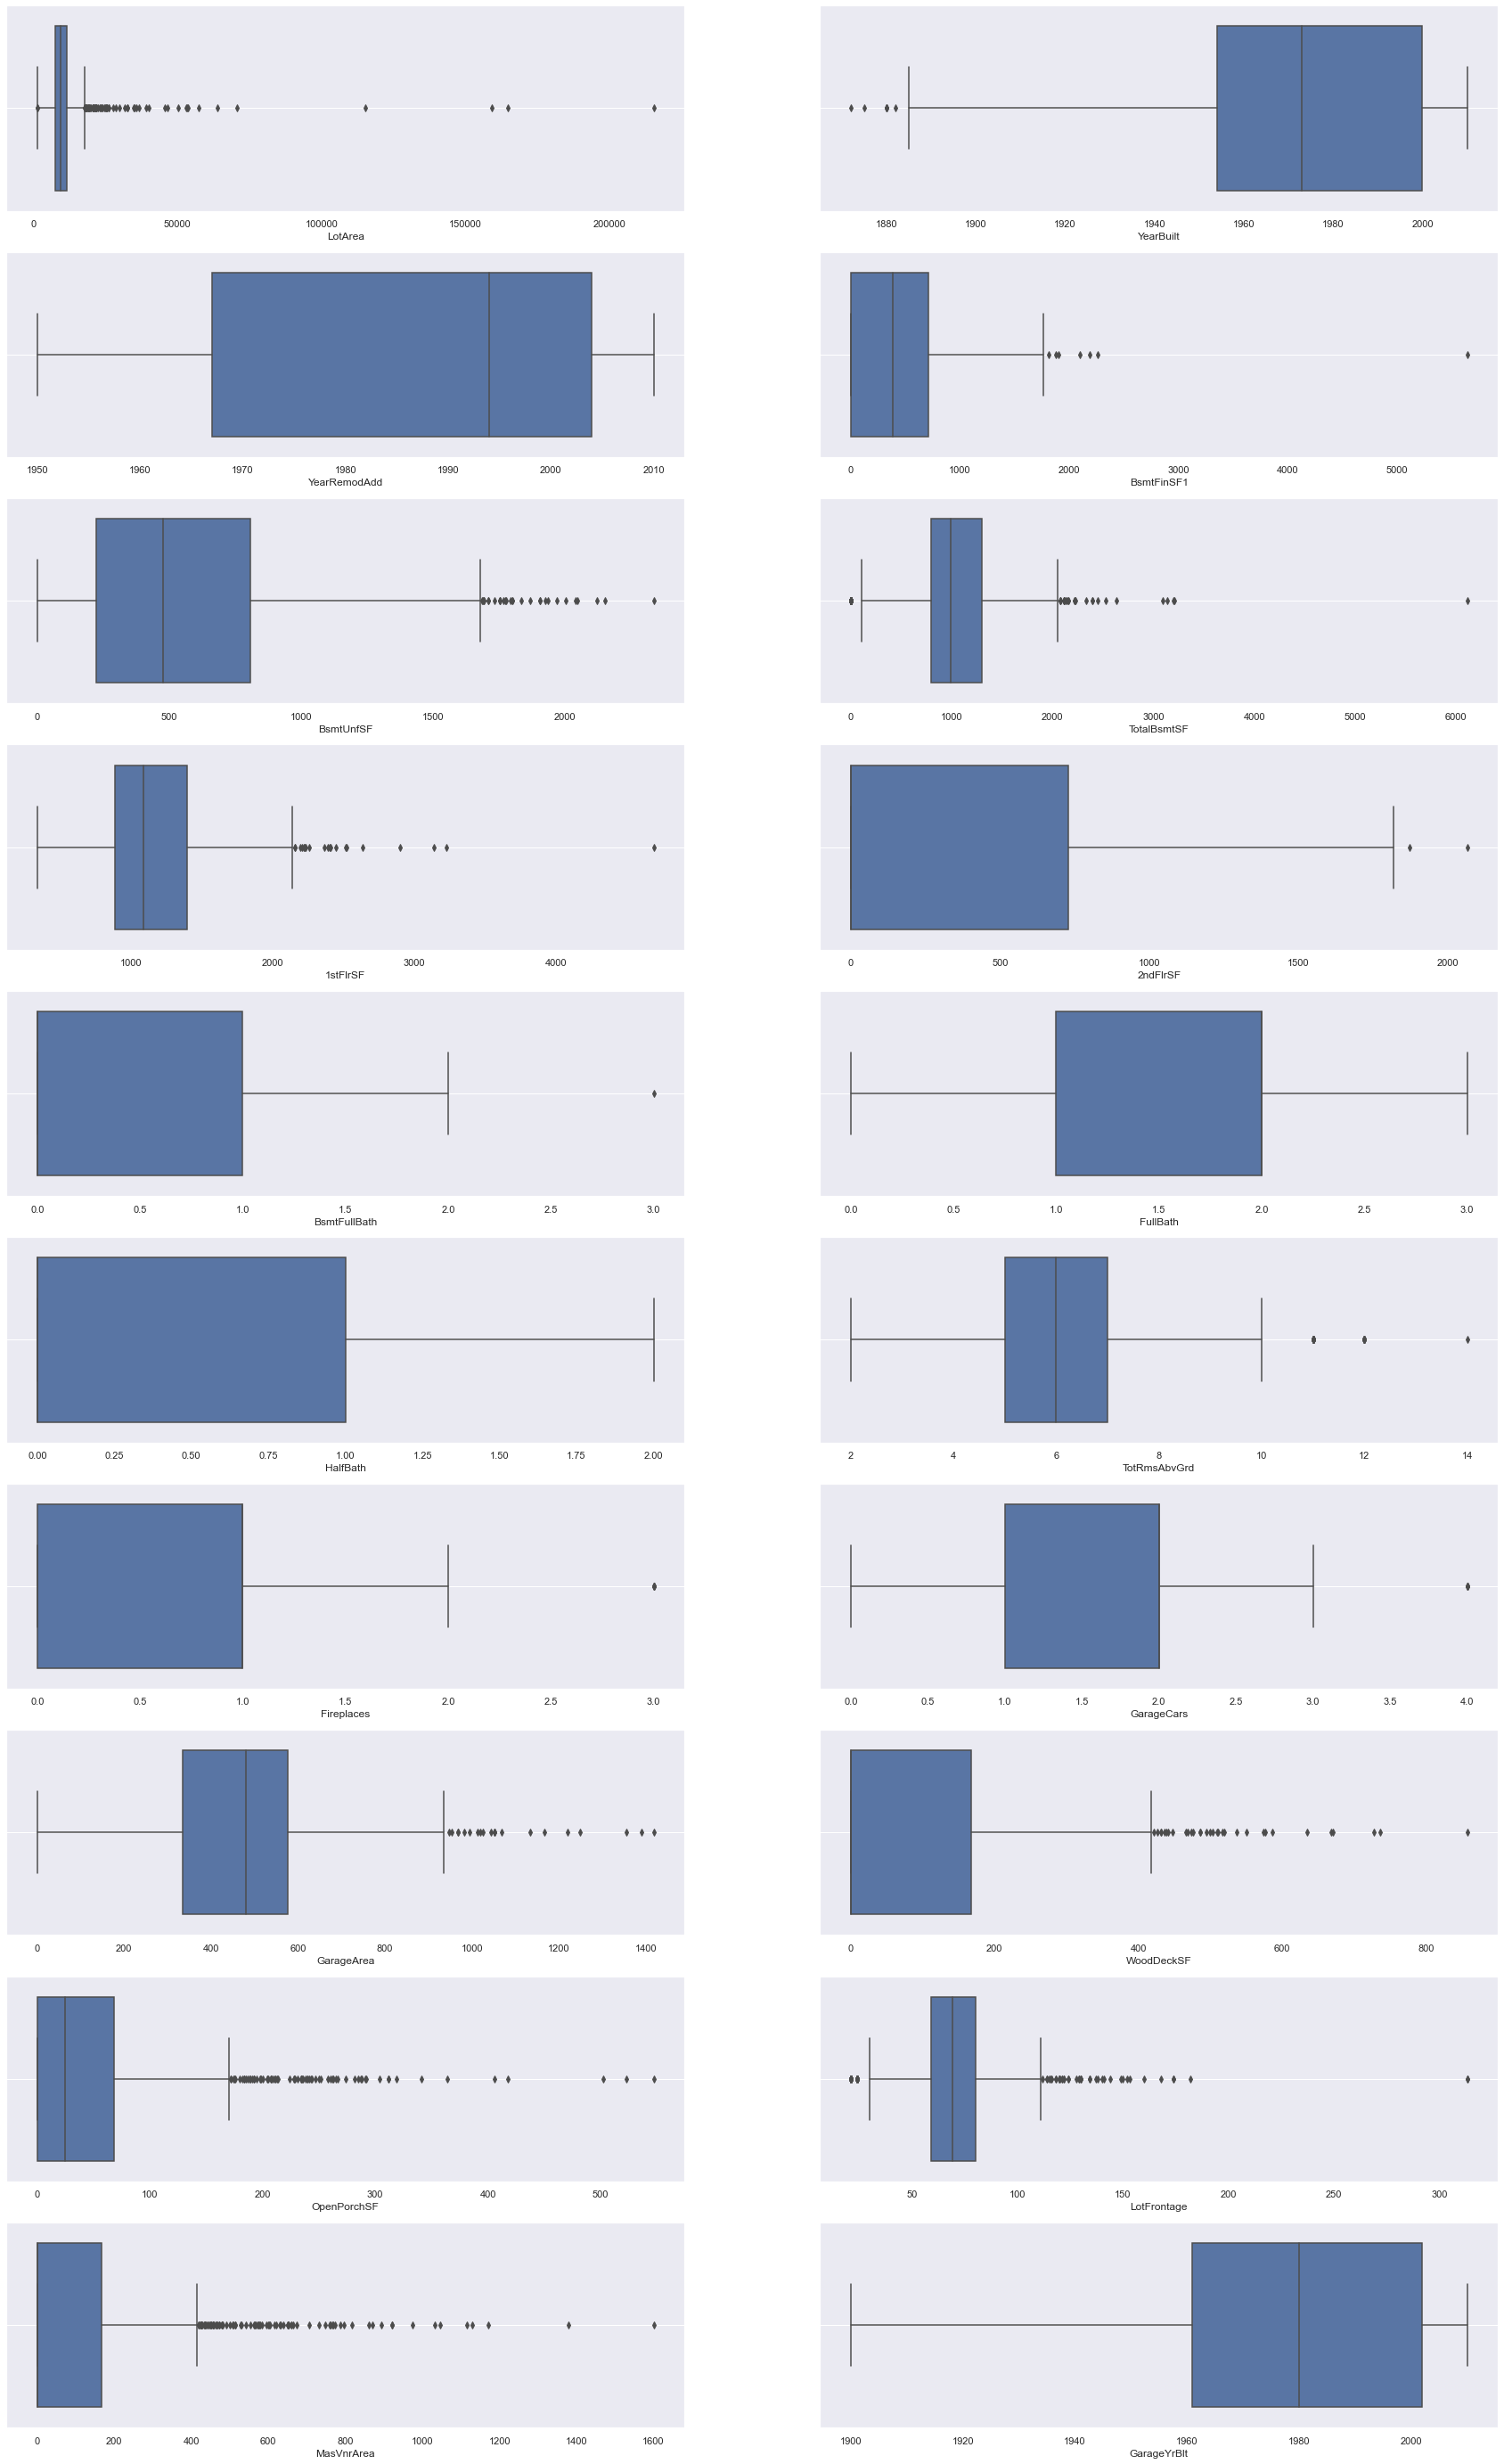

In [320]:
plt.rcParams["figure.figsize"] = (30,50) 


plt.subplot(10,2,1)
sns.boxplot(train['LotArea'])
plt.grid()


plt.subplot(10,2,2)
sns.boxplot(train['YearBuilt'])
plt.grid()


plt.subplot(10,2,3)
sns.boxplot(train['YearRemodAdd'])
plt.grid()


plt.subplot(10,2,4)
sns.boxplot(train['BsmtFinSF1'])
plt.grid()


plt.subplot(10,2,5)
sns.boxplot(train['BsmtUnfSF'])
plt.grid()

plt.subplot(10,2,6)
sns.boxplot(train['TotalBsmtSF'])
plt.grid()

plt.subplot(10,2,7)
sns.boxplot(train['1stFlrSF'])
plt.grid()

plt.subplot(10,2,8)
sns.boxplot(train['2ndFlrSF'])
plt.grid()

plt.subplot(10,2,9)
sns.boxplot(train['BsmtFullBath'])
plt.grid()

plt.subplot(10,2,10)
sns.boxplot(train['FullBath'])
plt.grid()

plt.subplot(10,2,11)
sns.boxplot(train['HalfBath'])
plt.grid()

plt.subplot(10,2,12)
sns.boxplot(train['TotRmsAbvGrd'])
plt.grid()

plt.subplot(10,2,13)
sns.boxplot(train['Fireplaces'])
plt.grid()

plt.subplot(10,2,14)
sns.boxplot(train['GarageCars'])
plt.grid()

plt.subplot(10,2,15)
sns.boxplot(train['GarageArea'])
plt.grid()

plt.subplot(10,2,16)
sns.boxplot(train['WoodDeckSF'])
plt.grid()

plt.subplot(10,2,17)
sns.boxplot(train['OpenPorchSF'])
plt.grid()

plt.subplot(10,2,18)
sns.boxplot(train['LotFrontage'])
plt.grid()

plt.subplot(10,2,19)
sns.boxplot(train['MasVnrArea'])
plt.grid()

plt.subplot(10,2,20)
sns.boxplot(train['GarageYrBlt'])
plt.grid()

## Categorical Variables

#### 'Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'

In [82]:
train.describe(include='object')

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,91,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,1460,15,5,2,2,4,4,2,5,3,...,6,3,5,5,3,3,4,4,9,6
top,1,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1,536,1151,1454,50,925,1311,1459,1052,1382,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [119]:
#Street and Utilities are bad predictors because differences in value counts are too large
list1=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for i in list1:
    print(train[i].value_counts())
    

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge   

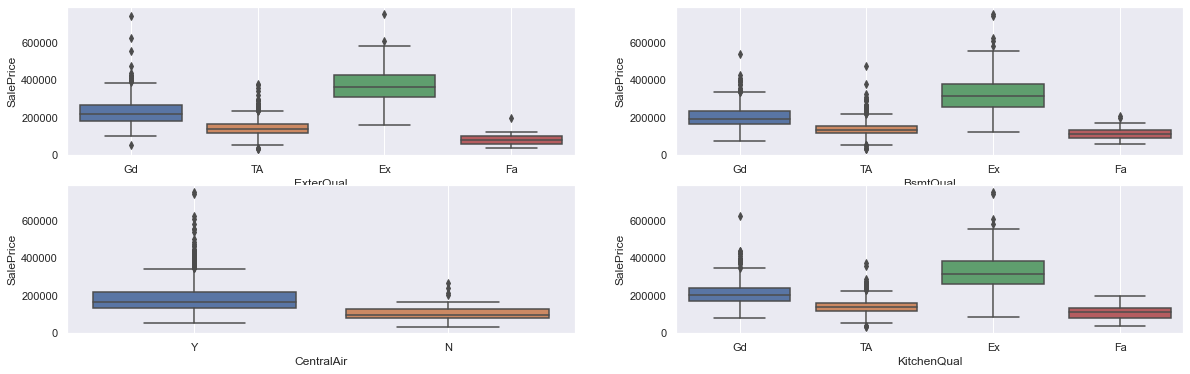

In [281]:
#The following categorical variables can potentially be good predictors for the SalePrice because distributions of price between the variable values are not overlapping too much

plt.rcParams["figure.figsize"] = (20,6) 


plt.subplot(2,2,1)
sns.boxplot(x="ExterQual", y="SalePrice", data=train)
plt.grid()

plt.subplot(2,2,2)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train)
plt.grid()


plt.subplot(2,2,3)
sns.boxplot(x="CentralAir", y="SalePrice", data=train)
plt.grid()


plt.subplot(2,2,4)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train)
plt.grid()


In [283]:
train1=train[["ExterQual", "BsmtQual", "CentralAir", "KitchenQual", "SalePrice"]]

train1.groupby(["ExterQual"],as_index=False).mean()
#Ex is the most expensive & Fa least expensive

,ExterQual,SalePrice
0,Ex,367360.961538
1,Fa,87985.214286
2,Gd,231633.510246
3,TA,144341.313466


In [284]:
train1.groupby(["BsmtQual"],as_index=False).mean()
#Ex is the most expensive & Fa least expensive

,BsmtQual,SalePrice
0,Ex,327041.041322
1,Fa,115692.028571
2,Gd,202688.478964
3,TA,140759.818182


In [285]:
train1.groupby(["CentralAir"],as_index=False).mean()
#Y is the most expensive & N least expensive

,CentralAir,SalePrice
0,N,105264.073684
1,Y,186186.709890


In [286]:
train1.groupby(["KitchenQual"],as_index=False).mean()
#Ex is the most expensive & Fa least expensive

,KitchenQual,SalePrice
0,Ex,328554.670000
1,Fa,105565.205128
2,Gd,212116.023891
3,TA,139962.511565


### Chi Square

In [326]:
import scipy.stats
from scipy.stats import chi2

table1=pd.crosstab(train["BsmtQual"],train["ExterQual"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table1)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     916.56
p-value:            1.6751e-191
degrees of freedom: 9
expected frequencies:
 [[4.42164441e+00 1.02037948e+00 4.14104006e+01 7.41475755e+01]
 [1.27898805e+00 2.95151089e-01 1.19782150e+01 2.14476458e+01]
 [2.25832748e+01 5.21152495e+00 2.11501054e+02 3.78704146e+02]
 [2.37160928e+01 5.47294448e+00 2.22110330e+02 3.97700632e+02]]


- The critical value for the chi-square test with a degree of freedom of 9 and alpha 0.05 is 3.325.
- Chi Square statistic (916.56) exceeds the critical value (3.325) so the null hypothesis is rejected.
- BsmtQual IS associated with ExterQual. BsmtQual and ExterQual are dependent on each other.

In [327]:
table2=pd.crosstab(train["ExterQual"],train["CentralAir"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table2)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     116.03
p-value:            5.5253e-25
degrees of freedom: 3
expected frequencies:
 [[  3.38356164  48.61643836]
 [  0.9109589   13.0890411 ]
 [ 31.75342466 456.24657534]
 [ 58.95205479 847.04794521]]


- The critical value for the chi-square test with a degree of freedom of 3 and alpha 0.05 is 0.352.
- Chi Square statistic (116.03) exceeds the critical value (0.352) so the null hypothesis is rejected.
- CentralAir IS associated with ExterQual. CentralAir and ExterQual are dependent on each other.

In [328]:
table3=pd.crosstab(train["ExterQual"],train["KitchenQual"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table3)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1312.3
p-value:            6.9884e-277
degrees of freedom: 9
expected frequencies:
 [[3.56164384e+00 1.38904110e+00 2.08712329e+01 2.61780822e+01]
 [9.58904110e-01 3.73972603e-01 5.61917808e+00 7.04794521e+00]
 [3.34246575e+01 1.30356164e+01 1.95868493e+02 2.45671233e+02]
 [6.20547945e+01 2.42013699e+01 3.63641096e+02 4.56102740e+02]]


- The critical value for the chi-square test with a degree of freedom of 9 and alpha 0.05 is 3.325.
- Chi Square statistic (1312.3) exceeds the critical value (3.325) so the null hypothesis is rejected.
- KitchenQual IS associated with ExterQual. KitchenQual and ExterQual are dependent on each other.

In [329]:
table4=pd.crosstab(train["CentralAir"],train["KitchenQual"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table4)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     174.33
p-value:            1.4806e-37
degrees of freedom: 3
expected frequencies:
 [[  6.50684932   2.53767123  38.13013699  47.82534247]
 [ 93.49315068  36.46232877 547.86986301 687.17465753]]


- The critical value for the chi-square test with a degree of freedom of 3 and alpha 0.05 is 0.352.
- Chi Square statistic (174.33) exceeds the critical value (0.352) so the null hypothesis is rejected.
- KitchenQual IS associated with CentralAir. KitchenQual and CentralAir are dependent on each other.

In [330]:
table5=pd.crosstab(train["CentralAir"],train["BsmtQual"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table5)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     68.183
p-value:            1.0452e-14
degrees of freedom: 3
expected frequencies:
 [[  6.88756149   1.99226985  35.17779339  36.94237526]
 [114.11243851  33.00773015 582.82220661 612.05762474]]


- The critical value for the chi-square test with a degree of freedom of 3 and alpha 0.05 is 0.352.
- Chi Square statistic (68.183) exceeds the critical value (0.352) so the null hypothesis is rejected.
- BsmtQual IS associated with CentralAir. BsmtQual and CentralAir are dependent on each other.

In [331]:
table6=pd.crosstab(train["BsmtQual"],train["KitchenQual"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(table6)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     758.24
p-value:            2.0667e-157
degrees of freedom: 9
expected frequencies:
 [[  8.50316233   2.97610682  49.48840478  60.03232607]
 [  2.45959241   0.86085734  14.31482783  17.36472242]
 [ 43.42937456  15.2002811  252.75895994 306.6113844 ]
 [ 45.6078707   15.96275474 265.43780745 321.99156711]]


- The critical value for the chi-square test with a degree of freedom of 9 and alpha 0.05 is 3.325.
- Chi Square statistic (758.24) exceeds the critical value (3.325) so the null hypothesis is rejected.
- BsmtQual IS associated with KitchenQual. BsmtQual and KitchenQual are dependent on each other.